### About:
These data, corresponding to participants ages 70-100, contain responses to the Modified Vulnerable Elders Survey, results from a grip-strength test using a handgrip dynamometer, and both acceleration and velocity every tenth of a second on a series of four 30-second balance tests on a Vii Balance Board. This series represented balancing with eyes open or closed, and feet apart or together.

This study was funded by a pilot grant from the University of Iowa Injury Prevention and Research Center.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Stylesheet
plt.style.use('seaborn-v0_8')

In [11]:
df = pd.read_csv("data/kaggle_data.csv")

In [12]:
df.head()

,pid,label,age,sex,grip_r1,grip_r2,grip_l1,grip_l2,health_rating,crouching_difficulty,...,trial_2_eyes_open_feet_together_acceleration_29_2,trial_2_eyes_open_feet_together_acceleration_29_3,trial_2_eyes_open_feet_together_acceleration_29_4,trial_2_eyes_open_feet_together_acceleration_29_5,trial_2_eyes_open_feet_together_acceleration_29_6,trial_2_eyes_open_feet_together_acceleration_29_7,trial_2_eyes_open_feet_together_acceleration_29_8,trial_2_eyes_open_feet_together_acceleration_29_9,trial_2_eyes_open_feet_together_acceleration_30_0,unsafe_to_complete
0,42,0,79,1,34.0,36.0,28.0,30.0,3,0,...,-252.224460,143.661469,-23.304684,121.762629,-105.629998,80.438506,-65.327236,11.309717,-278.902860,False
1,43,0,70,1,44.0,46.0,40.0,38.0,3,1,...,-198.528940,-17.809196,84.381914,186.187172,-460.159191,343.273230,-369.997818,110.351450,-421.246329,False
2,45,0,76,1,26.0,36.0,26.0,32.0,3,0,...,81.010816,-151.809522,134.402963,-185.558968,33.839239,88.418648,-159.501637,43.626207,-211.327369,False
3,46,0,86,1,18.0,18.0,16.0,12.0,3,2,...,239.017820,-59.749070,-281.576214,6.329850,142.954231,174.678496,-150.158231,-125.638017,-392.745582,False
4,47,0,75,1,40.0,44.0,42.0,44.0,4,1,...,-49.544343,-110.796627,-58.802568,-126.538295,280.544947,22.460276,151.250450,-516.497971,-0.010085,False


In [13]:
df.shape

(206, 4828)

In [41]:
# too many columns. Majority of columns are the repeated trials. We will only look at six trials
important_columns = ['label', 'age', 'sex', 'grip_r1', 'grip_l1', 'health_rating', 'crouching_difficulty',
                    'lifting_difficulty', 'walking_difficulty', 'has_fallen', 'has_near_fallen',
                    'trial_1_eyes_closed_feet_apart_velocity_0_1', 'trial_1_eyes_closed_feet_apart_velocity_0_2', 'trial_1_eyes_closed_feet_apart_velocity_0_3', 
                    'trial_2_eyes_open_feet_together_velocity_0_1', 'trial_2_eyes_open_feet_together_velocity_0_2', 'trial_2_eyes_open_feet_together_velocity_0_3']
df_subset = df[important_columns]
df_subset.head()

,label,age,sex,grip_r1,grip_l1,health_rating,crouching_difficulty,lifting_difficulty,walking_difficulty,has_fallen,has_near_fallen,trial_1_eyes_closed_feet_apart_velocity_0_1,trial_1_eyes_closed_feet_apart_velocity_0_2,trial_1_eyes_closed_feet_apart_velocity_0_3,trial_2_eyes_open_feet_together_velocity_0_1,trial_2_eyes_open_feet_together_velocity_0_2,trial_2_eyes_open_feet_together_velocity_0_3
0,0,79,1,34.0,28.0,3,0,0,0,0,1,79.722943,44.834942,78.966318,93.734461,41.016907,56.524029
1,0,70,1,44.0,40.0,3,1,0,0,1,1,28.586327,25.947429,18.514792,426.844332,280.273441,232.600307
2,0,76,1,26.0,26.0,3,0,0,0,0,0,47.820729,28.815425,33.684368,61.064392,44.862344,30.107110
3,0,86,1,18.0,16.0,3,2,0,0,0,0,36.865308,59.605334,34.759861,32.003350,59.176302,54.517892
4,0,75,1,40.0,42.0,4,1,0,0,0,1,30.388833,36.350520,53.308239,86.482268,45.903797,30.148599


In [42]:
df_subset.shape

(206, 17)

In [53]:
df_subset.nunique()

label                                             2
age                                              30
sex                                               2
grip_r1                                          35
grip_l1                                          35
health_rating                                     5
crouching_difficulty                              5
lifting_difficulty                                5
walking_difficulty                                5
has_fallen                                        2
has_near_fallen                                   2
trial_1_eyes_closed_feet_apart_velocity_0_1     204
trial_1_eyes_closed_feet_apart_velocity_0_2     204
trial_1_eyes_closed_feet_apart_velocity_0_3     204
trial_2_eyes_open_feet_together_velocity_0_1    204
trial_2_eyes_open_feet_together_velocity_0_2    204
trial_2_eyes_open_feet_together_velocity_0_3    204
dtype: int64

In [43]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   label                                         206 non-null    int64  
 1   age                                           206 non-null    int64  
 2   sex                                           206 non-null    int64  
 3   grip_r1                                       204 non-null    float64
 4   grip_l1                                       203 non-null    float64
 5   health_rating                                 206 non-null    int64  
 6   crouching_difficulty                          206 non-null    int64  
 7   lifting_difficulty                            206 non-null    int64  
 8   walking_difficulty                            206 non-null    int64  
 9   has_fallen                                    206 non-null    int

In [44]:
df_subset.isna().sum().sort_values(ascending = False) # sum down the column how many TRUES

grip_l1                                         3
trial_2_eyes_open_feet_together_velocity_0_3    2
trial_2_eyes_open_feet_together_velocity_0_2    2
grip_r1                                         2
trial_2_eyes_open_feet_together_velocity_0_1    2
trial_1_eyes_closed_feet_apart_velocity_0_3     2
trial_1_eyes_closed_feet_apart_velocity_0_2     2
trial_1_eyes_closed_feet_apart_velocity_0_1     2
has_near_fallen                                 0
label                                           0
has_fallen                                      0
age                                             0
lifting_difficulty                              0
crouching_difficulty                            0
health_rating                                   0
sex                                             0
walking_difficulty                              0
dtype: int64

In [51]:
df_subset.loc[df["trial_2_eyes_open_feet_together_velocity_0_1"].isna(),:] # look at all rows where column is "nan"
# PID 31, 142 has no data on any of the "trials" -> will delete rows
# will delete rows with missing grip test

,label,age,sex,grip_r1,grip_l1,health_rating,crouching_difficulty,lifting_difficulty,walking_difficulty,has_fallen,has_near_fallen,trial_1_eyes_closed_feet_apart_velocity_0_1,trial_1_eyes_closed_feet_apart_velocity_0_2,trial_1_eyes_closed_feet_apart_velocity_0_3,trial_2_eyes_open_feet_together_velocity_0_1,trial_2_eyes_open_feet_together_velocity_0_2,trial_2_eyes_open_feet_together_velocity_0_3
31,1,92,0,10.0,12.0,1,3,2,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN
142,1,79,0,10.0,10.0,3,4,4,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_subset_clean = df_subset.dropna()
df_subset_clean.isna().sum().sort_values(ascending = False) # sum down the column how many TRUES

label                                           0
has_fallen                                      0
trial_2_eyes_open_feet_together_velocity_0_2    0
trial_2_eyes_open_feet_together_velocity_0_1    0
trial_1_eyes_closed_feet_apart_velocity_0_3     0
trial_1_eyes_closed_feet_apart_velocity_0_2     0
trial_1_eyes_closed_feet_apart_velocity_0_1     0
has_near_fallen                                 0
walking_difficulty                              0
age                                             0
lifting_difficulty                              0
crouching_difficulty                            0
health_rating                                   0
grip_l1                                         0
grip_r1                                         0
sex                                             0
trial_2_eyes_open_feet_together_velocity_0_3    0
dtype: int64

In [36]:
df_subset_clean.shape

(200, 17)

In [145]:
df_subset_clean.to_csv('Wii_clean.csv')


In [37]:
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
label,206.0,0.470874,0.500367,0.000000,0.000000,0.000000,1.000000,1.000000
age,206.0,82.339806,7.472948,70.000000,76.000000,82.000000,88.000000,100.000000
sex,206.0,0.344660,0.476415,0.000000,0.000000,0.000000,1.000000,1.000000
grip_r1,204.0,21.289216,9.481103,3.000000,14.000000,20.000000,26.000000,48.000000
grip_l1,203.0,19.554187,8.739889,1.000000,13.000000,18.000000,25.500000,42.000000
health_rating,206.0,2.461165,0.965728,0.000000,2.000000,2.000000,3.000000,4.000000
crouching_difficulty,206.0,1.718447,1.403254,0.000000,0.000000,2.000000,3.000000,4.000000
lifting_difficulty,206.0,0.597087,1.103339,0.000000,0.000000,0.000000,1.000000,4.000000
walking_difficulty,206.0,0.825243,1.339291,0.000000,0.000000,0.000000,1.000000,4.000000
has_fallen,206.0,0.432039,0.496566,0.000000,0.000000,0.000000,1.000000,1.000000


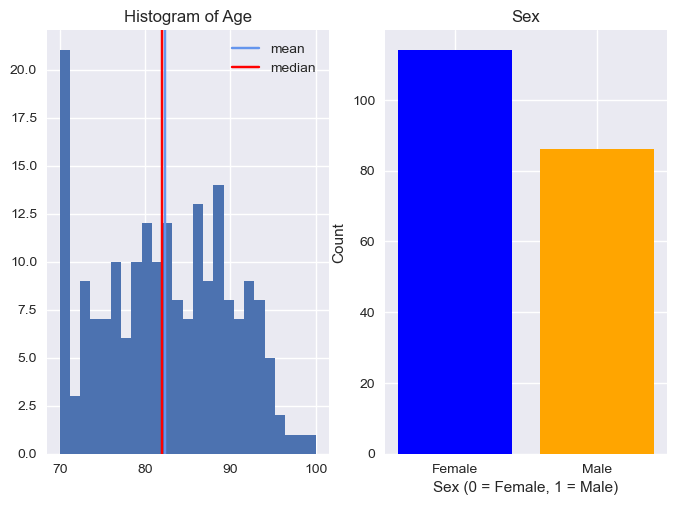

In [105]:
plt.subplots(1, 2)  # dispay two row, two columns

plt.subplot(1, 2, 1)  # in my 2x2 grid of plots, what's in slot 1?
plt.title(f"Histogram of Age")
plt.hist(df_subset_clean['age'], bins = 25)
plt.axvline(df_subset_clean['age'].mean(), label = "mean", color = "cornflowerblue")
plt.axvline(df_subset_clean['age'].median(), label = "median", color = "red")
plt.legend()

counts_sex = df_subset_clean['sex'].value_counts()
plt.subplot(1, 2, 2) 
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.title('Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(counts.index, ['Female', 'Male'])

plt.show()

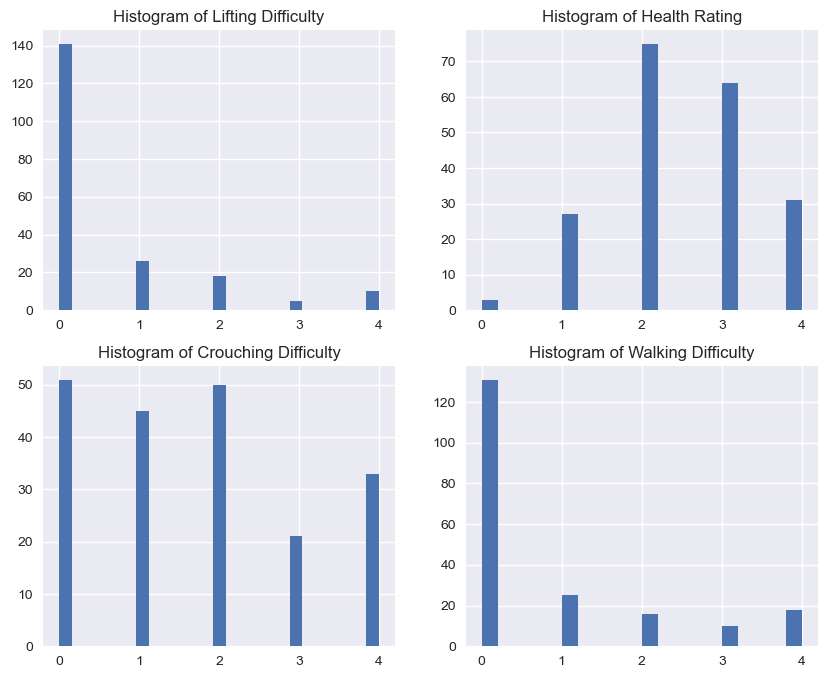

In [104]:
# Plotting four numeric columns: Age, health rating, crouching difficulty, walking difficulty
plt.subplots(2, 2, figsize=(10, 8))  # dispay two row, two columns


plt.subplot(2, 2, 1)  # in my 2x2 grid of plots, what's in slot 1?
plt.title(f"Histogram of Lifting Difficulty")
plt.hist(df_subset_clean['lifting_difficulty'], bins = 25)

plt.subplot(2, 2, 2)  # in my 2x2 grid of plots, what's in slot 2?
plt.title(f"Histogram of Health Rating")
plt.hist(df_subset_clean['health_rating'], bins = 20)

plt.subplot(2, 2, 3)  # in my 2x2 grid of plots, what's in slot 3?
plt.title(f"Histogram of Crouching Difficulty")
plt.hist(df_subset_clean['crouching_difficulty'], bins = 25)

plt.subplot(2, 2, 4)  # in my 2x2 grid of plots, what's in slot 4?
plt.title(f"Histogram of Walking Difficulty")
plt.hist(df_subset_clean['walking_difficulty'], bins = 20)

plt.show()

### Observations
- In a dataset of 200 participants aged 70-100, the mean age is 82.5
- Approx 85 males and 115 females
- Participants were asked to guage their own health status and mobility on an ambiguous scale of 0-4
- Most participants scored their general health at a 2 or 3
- The spread for `crouching_difficulty` is spread quite evenly
- The majority of participants scored their `walking_difficulty` at a score of 0 (no difficulty)

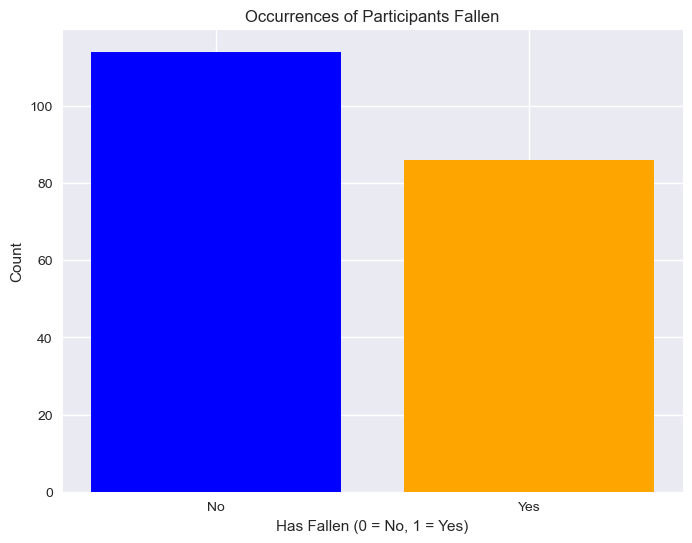

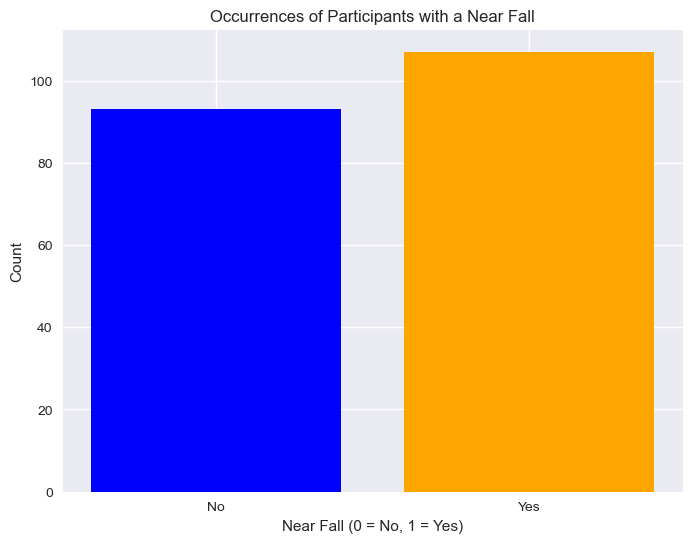

In [103]:
counts = df_subset_clean['has_fallen'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.title('Occurrences of Participants Fallen')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(counts.index, ['No', 'Yes'])

counts_near_fall = df_subset_clean['has_near_fallen'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(counts_near_fall.index, counts_near_fall.values, color=['orange', 'blue'])
plt.title('Occurrences of Participants with a Near Fall')
plt.xlabel('Near Fall (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(counts.index, ['No', 'Yes'])
plt.show()

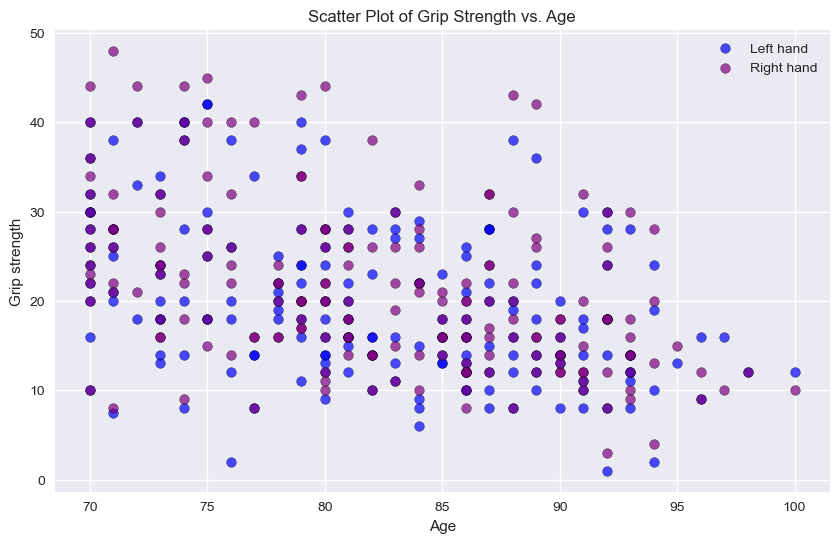

In [147]:
plt.figure(figsize=(10, 6))  # Create a figure with a specified size

# Create scatter plot
plt.scatter(df_subset_clean['age'], df_subset_clean['grip_l1'], color='blue', alpha=0.7, edgecolors='k', label='Left hand')

plt.scatter(df_subset_clean['age'], df_subset_clean['grip_r1'], color='purple', alpha=0.7, edgecolors='k', label='Right hand')


# Set title and labels
plt.title('Scatter Plot of Grip Strength vs. Age')
plt.xlabel('Age')
plt.ylabel('Grip strength')
plt.legend()
plt.savefig('Scatter_grip_vs_age.png')

plt.show()




#### Observations:
- Slight negative correlation between grip strength and age in this sample
- Is grip strength a good marker for physical competency? 

In [124]:
grouped_mean_r1 = df_subset_clean.groupby('has_fallen')['grip_r1'].mean()
grouped_mean_l1 = df_subset_clean.groupby('has_fallen')['grip_l1'].mean()


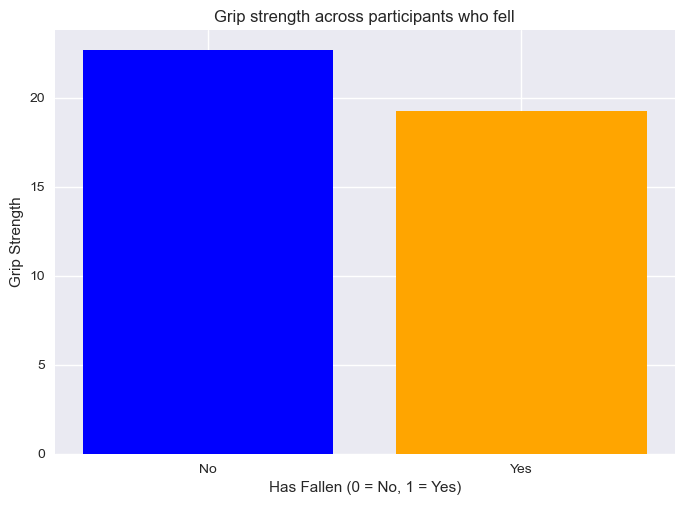

In [156]:
plt.figure()
plt.bar(grouped_mean_r1.index, grouped_mean.values, color=['blue', 'orange'])
plt.title('Grip strength across participants who fell')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Grip Strength')
plt.xticks(counts.index, ['No', 'Yes'])
plt.savefig('grip_vs_fall.png')
plt.show()

In [128]:
grouped_mean_walking = df_subset_clean.groupby('has_fallen')['walking_difficulty'].mean()
grouped_mean_lifting = df_subset_clean.groupby('has_fallen')['lifting_difficulty'].mean()
grouped_mean_crouching = df_subset_clean.groupby('has_fallen')['crouching_difficulty'].mean()
grouped_mean_health = df_subset_clean.groupby('has_fallen')['health_rating'].mean()

print(grouped_mean_walking, grouped_mean_lifting, grouped_mean_crouching, grouped_mean_health)


has_fallen
0    0.552632
1    1.116279
Name: walking_difficulty, dtype: float64 has_fallen
0    0.482456
1    0.720930
Name: lifting_difficulty, dtype: float64 has_fallen
0    1.438596
1    2.046512
Name: crouching_difficulty, dtype: float64 has_fallen
0    2.719298
1    2.127907
Name: health_rating, dtype: float64


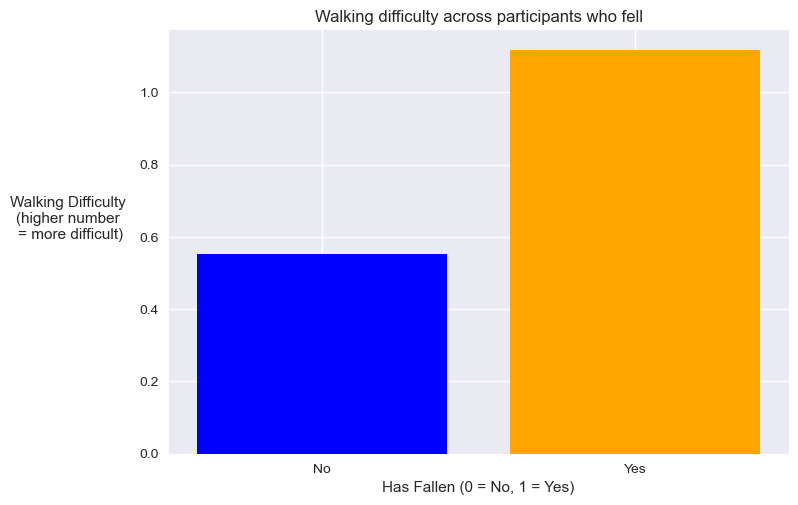

In [148]:
plt.figure()
plt.bar(grouped_mean_walking.index, grouped_mean_walking.values, color=['blue', 'orange'])
plt.title('Walking difficulty across participants who fell')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Walking Difficulty \n(higher number \n= more difficult)', labelpad = 50, rotation = 0)
plt.xticks(counts.index, ['No', 'Yes'])
plt.savefig('Walking_diff.png')
plt.show()

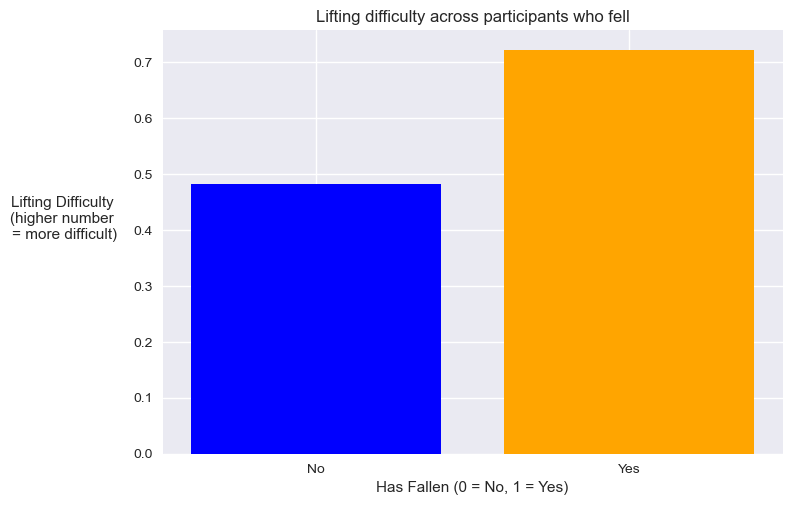

In [142]:
plt.figure()
plt.bar(grouped_mean_lifting.index, grouped_mean_lifting.values, color=['blue', 'orange'])
plt.title('Lifting difficulty across participants who fell')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Lifting Difficulty \n(higher number \n= more difficult)', labelpad = 50, rotation = 0)
plt.xticks(counts.index, ['No', 'Yes'])
plt.show()

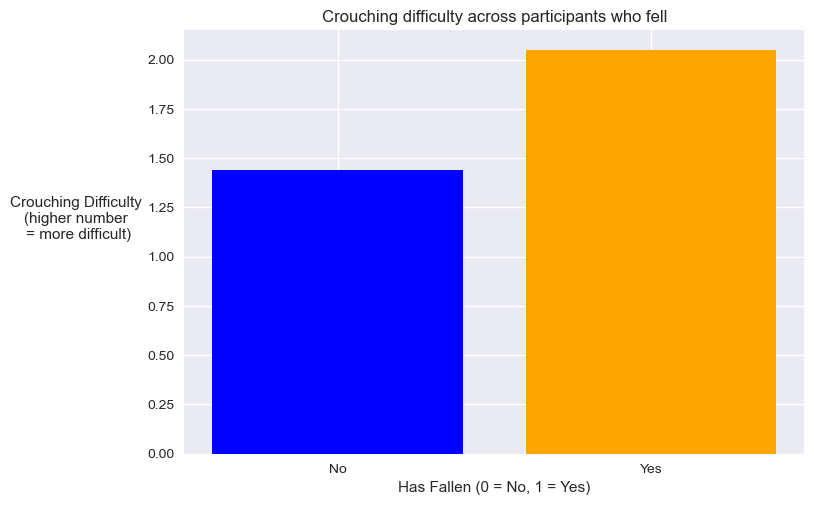

In [143]:
plt.figure()
plt.bar(grouped_mean_crouching.index, grouped_mean_crouching.values, color=['blue', 'orange'])
plt.title('Crouching difficulty across participants who fell')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Crouching Difficulty \n(higher number \n= more difficult)', labelpad = 50, rotation = 0)
plt.xticks(counts.index, ['No', 'Yes'])
plt.show()

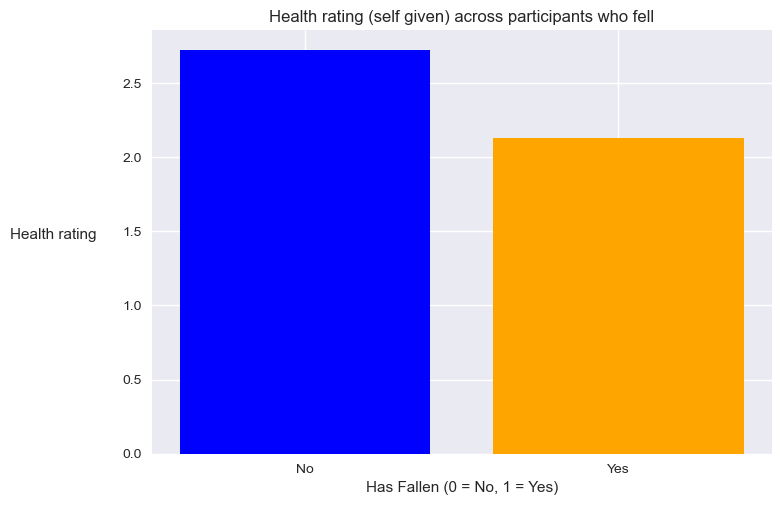

In [144]:
plt.figure()
plt.bar(grouped_mean_health.index, grouped_mean_health.values, color=['blue', 'orange'])
plt.title('Health rating (self given) across participants who fell')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Health rating', labelpad = 50, rotation = 0)
plt.xticks(counts.index, ['No', 'Yes'])
plt.show()